# Лабораторная работа №3: Обработка признаков (часть 2)

# Задание:

1. Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:

     i. масштабирование признаков (не менее чем тремя способами);
  
    ii. обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);

    iii. обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);

    iv. отбор признаков:
      - один метод из группы методов фильтрации (filter methods);
   
      - один метод из группы методов обертывания (wrapper methods);
   
      - один метод из группы методов вложений (embedded methods).

# Текстовое описание датасета

В качестве датасета будем использовать набор данных, содержащий данные с информацией об автомобиле.

Набор данных имеет следующие атрибуты:

- Name: Уникальный идентификатор для каждого автомобиля.
- MPG: Эффективность использования топлива измеряется в милях на галлон.
- Cylinders: количество цилиндров в двигателе.
- Displacement: объем двигателя с указанием его размера или мощности.
- Horsepower: Выходная мощность двигателя.
- Weight: Вес автомобиля.
- Acceleration: Возможность увеличения скорости, измеряемая в секундах.
- Model Year: год выпуска модели автомобиля.
- Origin: Страна или регион происхождения каждого автомобиля.

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso
import seaborn as sns
import warnings
import math
warnings.simplefilter('ignore')

### Загрузка данных

In [2]:
data = pd.read_csv('Automobile.csv')

Выведем первые строки

In [3]:
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


Выведем типы данных для всех столбцов

In [4]:
data.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

## Обработка нестандартных признаков

### Признак name.
Извлечем бренд автомобиля из названия

In [5]:
data['brand'] = data['name'].apply(lambda x: x.split()[0])
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa,amc
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa,ford


## Масштабирование признаков

In [6]:
numeric_columns = [column for column in data.columns if data.dtypes[column] != object]

In [7]:
numeric_columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

StandardScaler

In [8]:
data1 = pd.DataFrame(StandardScaler().fit_transform(data[numeric_columns]), columns=numeric_columns);
data1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,-0.706439,1.498191,1.090604,0.664133,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.574594,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.184397,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.184397,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.924265,0.565841,-1.840117,-1.627426


In [9]:
data1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,3.980000e+02,3.980000e+02,3.980000e+02,3.920000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,7.141133e-17,-3.570567e-17,-1.785283e-17,-1.812609e-16,-1.606755e-16,-2.677925e-16,-1.642461e-15
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001278e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.859374e+00,-1.444949e+00,-1.204411e+00,-1.520975e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00
25%,-7.704907e-01,-8.563206e-01,-8.563178e-01,-7.665929e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01
50%,-6.591883e-02,-8.563206e-01,-4.314040e-01,-2.853488e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03
75%,7.027050e-01,1.498191e+00,6.584879e-01,5.600800e-01,7.538337e-01,5.834349e-01,8.096310e-01
max,2.957335e+00,1.498191e+00,2.511784e+00,3.265452e+00,2.565185e+00,3.351912e+00,1.621983e+00


MinMaxScaler

In [10]:
data2 = pd.DataFrame(MinMaxScaler().fit_transform(data[numeric_columns]), columns=numeric_columns);
data2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0


In [11]:
data2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,0.386026,0.490955,0.324098,0.317768,0.384867,0.450482,0.500838
std,0.207872,0.340201,0.269431,0.209191,0.240103,0.164148,0.308136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.226064,0.200000,0.093669,0.157609,0.173164,0.346726,0.250000
50%,0.372340,0.200000,0.208010,0.258152,0.337539,0.446429,0.500000
75%,0.531915,1.000000,0.501292,0.434783,0.565637,0.546131,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


RobustScaler

In [12]:
data3 = pd.DataFrame(RobustScaler().fit_transform(data[numeric_columns]), columns=numeric_columns);
data3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,-0.434783,1.0,1.004754,0.715686,0.506050,-1.044776,-1.0
1,-0.695652,1.0,1.277338,1.401961,0.642586,-1.194030,-1.0
2,-0.434783,1.0,1.074485,1.107843,0.456926,-1.343284,-1.0
3,-0.608696,1.0,0.985737,1.107843,0.454759,-1.044776,-1.0
4,-0.521739,1.0,0.973059,0.911765,0.466318,-1.492537,-1.0


In [13]:
data3.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,0.044745,0.363693,0.284792,0.215086,0.120588,0.020326,0.001675
std,0.679651,0.425251,0.660982,0.754729,0.611769,0.823191,0.616271
min,-1.217391,-0.250000,-0.510301,-0.931373,-0.860033,-2.238806,-1.000000
25%,-0.478261,0.000000,-0.280507,-0.362745,-0.418819,-0.500000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.521739,1.000000,0.719493,0.637255,0.581181,0.500000,0.500000
max,2.052174,1.000000,1.942948,2.676471,1.687918,2.776119,1.000000


## Обработка выбросов для числовых признаков

Замена выбросов

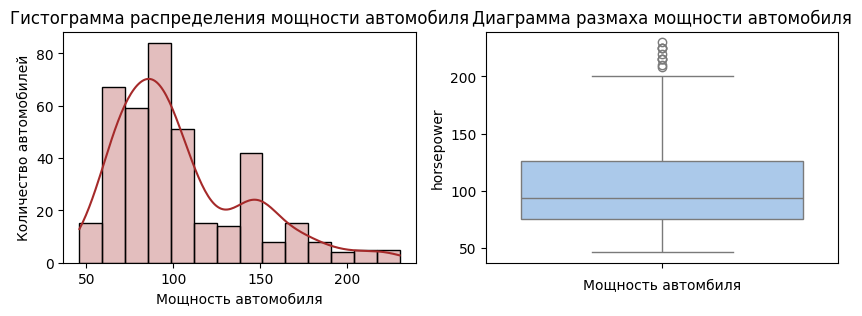

In [14]:
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, 2)
sns.histplot(data['horsepower'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения мощности автомобиля")
axes[0].set_xlabel('Мощность автомобиля')
axes[0].set_ylabel('Количество автомобилей')
sns.boxplot(data['horsepower'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха мощности автомобиля")
axes[1].set_xlabel('Мощность автомбиля')
plt.show();

In [15]:
K = 1.5
col = 'horsepower'
IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
lower_boundary = data[col].quantile(0.25) - (K * IQR)
upper_boundary = data[col].quantile(0.75) + (K * IQR)
round(lower_boundary, 2), round(upper_boundary, 2)

(-1.5, 202.5)

In [16]:
data[col] = np.where(data[col] > upper_boundary, upper_boundary, np.where(data[col] < lower_boundary, lower_boundary, data[col]))

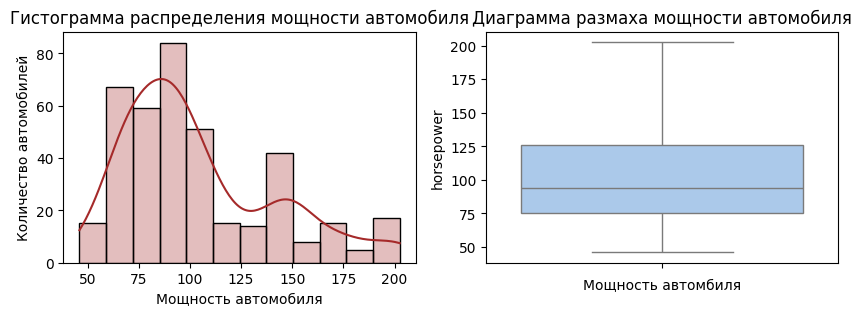

In [17]:
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, 2)
sns.histplot(data['horsepower'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения мощности автомобиля")
axes[0].set_xlabel('Мощность автомобиля')
axes[0].set_ylabel('Количество автомобилей')
sns.boxplot(data['horsepower'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха мощности автомобиля")
axes[1].set_xlabel('Мощность автомбиля')
plt.show();

Удаление выбросов

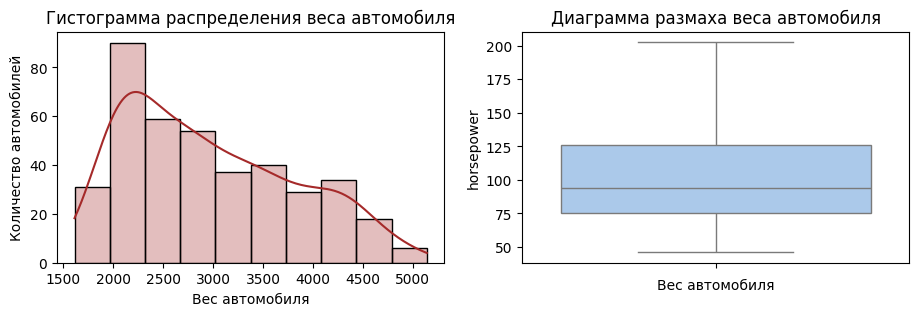

In [18]:
fig = plt.figure(figsize=(11, 3))
axes = fig.subplots(1, 2)
sns.histplot(data['weight'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения веса автомобиля")
axes[0].set_xlabel('Вес автомобиля')
axes[0].set_ylabel('Количество автомобилей')
sns.boxplot(data['horsepower'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха веса автомобиля")
axes[1].set_xlabel('Вес автомобиля')
plt.show();

In [19]:
K = 1.5
col = 'weight'
IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
lower_boundary = data[col].quantile(0.25) - (K * IQR)
upper_boundary = data[col].quantile(0.75) + (K * IQR)
round(lower_boundary, 2), round(upper_boundary, 2)

(147.38, 5684.38)

In [20]:
data = data[data['horsepower'] < 5684.38]

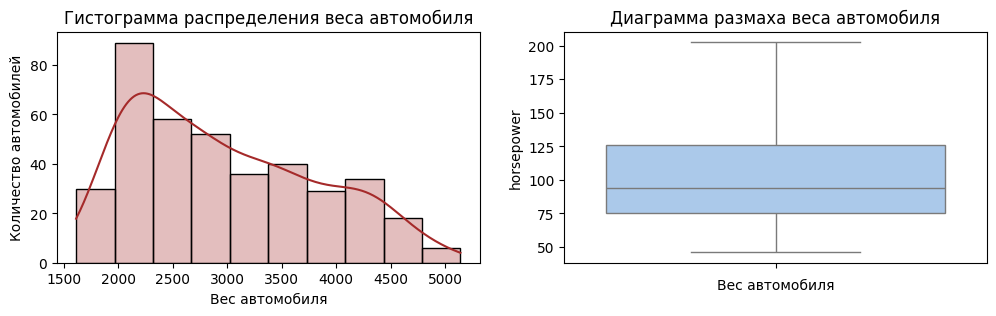

In [21]:
fig = plt.figure(figsize=(12, 3))
axes = fig.subplots(1, 2)
sns.histplot(data['weight'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения веса автомобиля")
axes[0].set_xlabel('Вес автомобиля')
axes[0].set_ylabel('Количество автомобилей')
sns.boxplot(data['horsepower'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха веса автомобиля")
axes[1].set_xlabel('Вес автомобиля')
plt.show();

## Отбор признаков

Метод фильтрации

In [22]:
print(f'Всего записей: {data.shape[0]}')
print('--------------------')
for column in data.columns:
    print(f'{column}: {data[column].value_counts().count()} уникальных значений', end='\n\n')

Всего записей: 392
--------------------
name: 301 уникальных значений

mpg: 127 уникальных значений

cylinders: 5 уникальных значений

displacement: 81 уникальных значений

horsepower: 88 уникальных значений

weight: 346 уникальных значений

acceleration: 95 уникальных значений

model_year: 13 уникальных значений

origin: 3 уникальных значений

brand: 37 уникальных значений



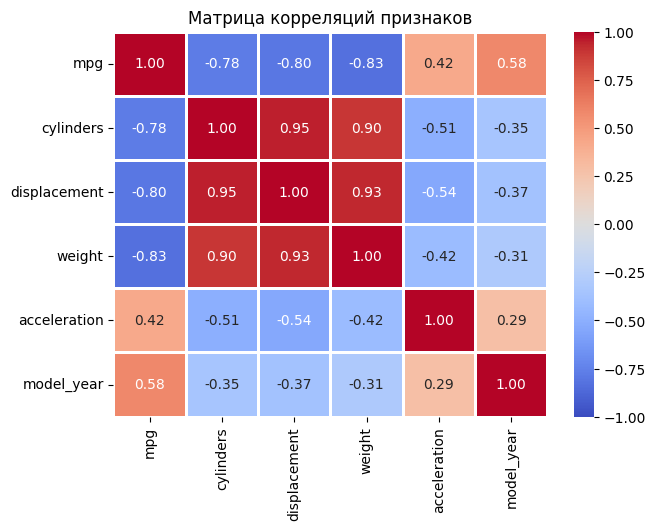

In [24]:
plt.figure(figsize=(7, 5))
sns.heatmap(data1.drop('horsepower', axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidth=1)
plt.title('Матрица корреляций признаков');

In [25]:
plt.figure(figsize=(7, 4))
sns.heatmap(pd.DataFrame(data.corr()['horsepower'].sort_values(ascending=False)[1:]), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция признаков с мощностью автомобиля');

ValueError: could not convert string to float: 'chevrolet chevelle malibu'

<Figure size 700x400 with 0 Axes>

In [26]:
columns1 = ['cylinders', 'displacement', 'weight']
columns1

['cylinders', 'displacement', 'weight']

Метод вложений

In [30]:
e_ls1 = Lasso(random_state=1)
e_ls1.fit(data[numeric_columns], data['horsepower'])
list(zip(numeric_columns, e_ls1.coef_))

[('mpg', -0.06196897118917083),
 ('cylinders', -0.0),
 ('displacement', 0.0774242234156586),
 ('weight', 0.02209884874298663),
 ('acceleration', -4.422586344149427),
 ('model_year', -0.7039526618306754)]

In [31]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(data[numeric_columns], data['horsepower'])
list(zip(numeric_columns, sel_e_ls1.get_support()))

[('mpg', True),
 ('cylinders', False),
 ('displacement', True),
 ('weight', True),
 ('acceleration', True),
 ('model_year', True)]

In [32]:
columns3 = numeric_columns
columns3

['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model_year']